In [2]:
import serial,time # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import openpyxl # type: ignore
import os
import pandas as pd # type: ignore

NameError: name 'warnings' is not defined

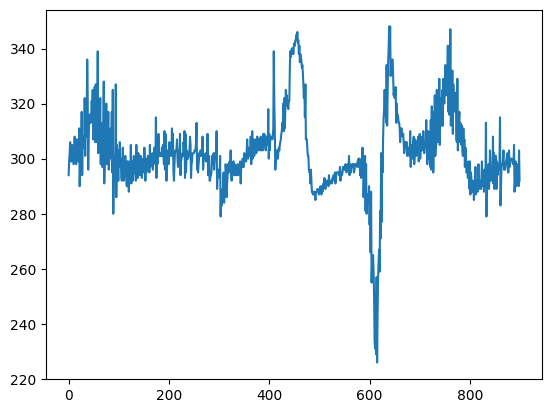

In [2]:
arduino = serial.Serial('COM3',9600,timeout=0.01)# Se debe indicar el puerto serial y la velocidad de transmision 

time.sleep(2)

numero_datos = 900 # esto corresponde al numero de datos que se va adquirir, se puede modificar pero 1000 es un buen numero 
EMG = np.ndarray((0),dtype=int) # aquí se almacenará la señal 

# mientras el arreglo no tenga los datos que requiero los solicito
while EMG.shape[0] < numero_datos: 
    
    # esto lee lo que haya en el buffer
    datos = arduino.readlines(arduino.inWaiting())
    
    datos_por_leer = len(datos)
    
  
    # Si hay mas datos de los que quiero leer
    # solo me quedo con la cantidad que me interesa
    if len(datos) > numero_datos:
        datos = datos[0:numero_datos]
        # creo un arreglo de ceros para leer estos valores
        valores_leidos = np.zeros(numero_datos,dtype = int)
    else:
        # creo un arreglo de ceros para leer estos valores
        valores_leidos = np.zeros(datos_por_leer,dtype = int)

    
    posicion = 0
    #se convierten los datos a valores numericos de voltaje. 
    for dato in datos:
        # voy a tratar de convertir los datos
        try:
            # elimino los saltos de linea y caracter de retorno y convierto a entero
            valores_leidos[posicion] = int(dato.decode().strip())
        except:
            # si no puedo convertir completo la muestra con el anterior
             valores_leidos[posicion] = 0  # alternativa
            #valores_leidos[posicion] = valores_leidos[posicion-1]
        posicion = posicion + 1
    # agrego los datos leidos al arreglo
    EMG = np.append(EMG,valores_leidos)
    # Introduzco un delay para que se llene de nuevo el buffer
    time.sleep(2)

# como la ultima lectura puede tener mas datos de los que necesito descarto las muestras restantes
EMG = EMG[0:numero_datos]

# ya con los datos leidos podemos graficar y guardar
ruta_actual =r"C:\Users\Juan Camilo\Documents\Juanca\[02]UNIVERSIDAD\BIOSEÑALES\LABORATORIO\Entregable_2"
nombre_archivo = "sujeto10.xlsx"
ruta = os.path.join(ruta_actual, nombre_archivo)
# Crear un nuevo libro de trabajo de Excel
libro_trabajo = openpyxl.Workbook()

# Seleccionar la hoja activa
hoja = libro_trabajo.active

# Escribir la señal en la hoja de Excel
for i, valor in enumerate(EMG, start=1):
    hoja.cell(row=i, column=1).value = valor

# Guardar el archivo Excel
libro_trabajo.save(ruta)
plt.plot(EMG)
plt.show()
arduino.close()  # Cerrar puerto serial, siempre debe cerrarse